# Sign Language MNIST

## Library

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use(['seaborn-white'])

import warnings
warnings.filterwarnings('ignore')

import os

In [2]:
import keras
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard

from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau

In [49]:
train = pd.read_csv('/content/sign_mnist_train.csv')
test = pd.read_csv('/content/sign_mnist_test.csv')

In [50]:
train.isnull().sum().sum()

0

In [51]:
test.isnull().sum().sum()

0

In [52]:
num_classes = train['label'].nunique()
unique_val = train['label'].unique()

In [53]:
y_train = np.array(train['label'])
y_test = np.array(test['label'])

train = train.drop(['label'], axis=1)
test = test.drop(['label'], axis=1)

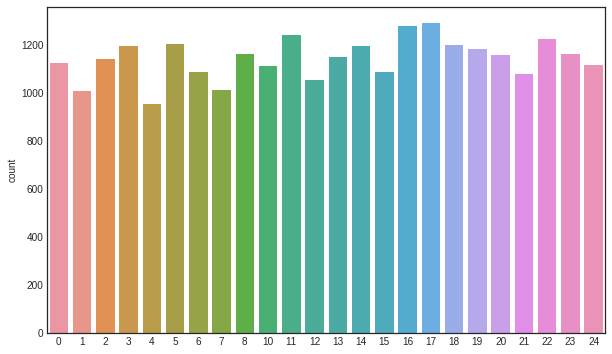

In [54]:
plt.figure(figsize=(10, 6))
sns.countplot(y_train)
plt.show()

In [55]:
x_train = np.array(train)
x_test = np.array(test)

In [56]:
x_train = x_train / 255
x_test = x_test / 255

In [57]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

x_train.shape, x_test.shape

((27455, 28, 28, 1), (7172, 28, 28, 1))

In [58]:
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

y_train.shape, y_test.shape

((27455, 24), (7172, 24))

In [59]:
epochs = 30
batch_size = 32

In [60]:
class LeNet5(Model):
    def __init__(self, num_classes):
        super(LeNet5, self).__init__()
        self.conv1 = Conv2D(filters=6, kernel_size=(5, 5), padding='same', activation='relu')
        self.conv2 = Conv2D(filters=16, kernel_size=(5, 5), activation='relu')
        self.max_pool = MaxPool2D(pool_size=(2, 2))
        self.flatten = Flatten()
        self.dense1 = Dense(units=120, activation='relu')
        self.dense2 = Dense(units=64, activation='relu')
        self.dense3 = Dense(units=24, activation='softmax')
        
    def call(self, input_data):
        x = self.max_pool(self.conv1(input_data))
        x = self.max_pool(self.conv2(x))
        x = self.flatten(x)
        x = self.dense3(self.dense2(self.dense1(x)))
        
        return x

In [61]:
model = LeNet5(num_classes)

In [63]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [65]:
callbacks = [EarlyStopping(patience=3, monitor='val_accuracy'),
            TensorBoard(log_dir='./logs', histogram_freq=1)]

In [66]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          callbacks=callbacks)

Epoch 1/30
858/858 [==============================] - 31s 35ms/step - loss: 0.9669 - accuracy: 0.7056 - val_loss: 0.5190 - val_accuracy: 0.8313
Epoch 2/30
858/858 [==============================] - 26s 30ms/step - loss: 0.0723 - accuracy: 0.9833 - val_loss: 0.3596 - val_accuracy: 0.8908
Epoch 3/30
858/858 [==============================] - 22s 26ms/step - loss: 0.0321 - accuracy: 0.9921 - val_loss: 0.3046 - val_accuracy: 0.9282
Epoch 4/30
858/858 [==============================] - 22s 26ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.3476 - val_accuracy: 0.9237
Epoch 5/30
858/858 [==============================] - 23s 27ms/step - loss: 7.4068e-04 - accuracy: 1.0000 - val_loss: 0.3867 - val_accuracy: 0.9222
Epoch 6/30
858/858 [==============================] - 23s 26ms/step - loss: 0.0405 - accuracy: 0.9882 - val_loss: 0.3493 - val_accuracy: 0.9244


In [ ]:
%load_ext tensorboard

In [ ]:
%tensorboard --logdir './logs'

## d

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)